In [2]:
from keras.applications import VGG16

In [3]:
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/home/home/Git/DataSets/Dogs_Cats/train_4000_test_1000/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                        directory,
                        target_size=(150,150),
                        batch_size =batch_size,
                        class_mode = 'binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features,labels
train_features,train_labels = extract_features(train_dir,2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


ValueError: cannot reshape array of size 8192000 into shape (2000,8192)

In [6]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [8]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history= model.fit(train_features,train_labels,
                  epochs=30,
                  batch_size=20,
                  validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.5983 - acc: 0.6750 - val_loss: 0.4448 - val_acc: 0.8360
Epoch 2/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.4361 - acc: 0.7990 - val_loss: 0.3622 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3533 - acc: 0.8495 - val_loss: 0.3271 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3198 - acc: 0.8665 - val_loss: 0.2999 - val_acc: 0.8940
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2886 - acc: 0.8855 - val_loss: 0.2863 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2679 - acc: 0.8945 - val_loss: 0.2759 - val_acc: 0.8990
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2449 - acc: 0.9040 - val_loss: 0.2697 - val_acc: 0.8980
Epoch 8/30
200

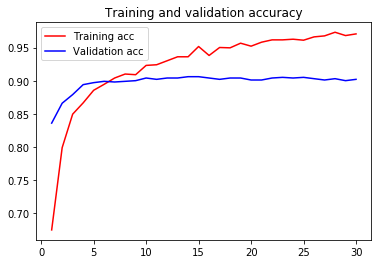

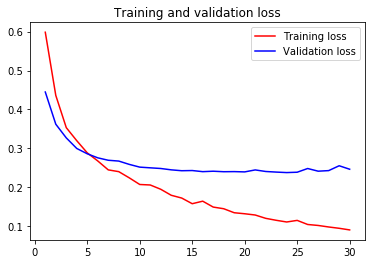

In [10]:
import matplotlib.pyplot as plt
def my_plot(h):  
    acc = h['acc']
    val_acc = h['val_acc']
    loss = h['loss']
    val_loss = h['val_loss']
    epochs = range(1,len(acc)+1)

    plt.plot(epochs,acc,'r',label='Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'r',label='Training loss')
    plt.plot(epochs,val_loss,'b',label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
my_plot(history.history)